<a href="https://colab.research.google.com/github/5hogun-Ormerod/Machine-learning-Python/blob/master/NCME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![url[1]](https://www.cambiumassessment.com/-/media/project/cambium/corporate/images/cambium-logos/cambium-logo-duo-horz.svg?h=100&iar=1&w=366&hash=C00906A955D72F21062086CF7A5CF77E)


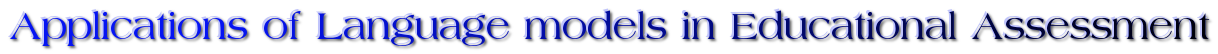


---

**Presenters:**

---

**Christopher Ormerod**, *Principle Mathematician at Cambium Assessment*

**Amir Jafari**, *Lead Data Scientist at Cambium Assessment*

**Sue Lottridge**, *Senior Director of Automated Scoring at Cambium Assessment*

---

This notebook was prepared for the training course delivered at NCME 2022.

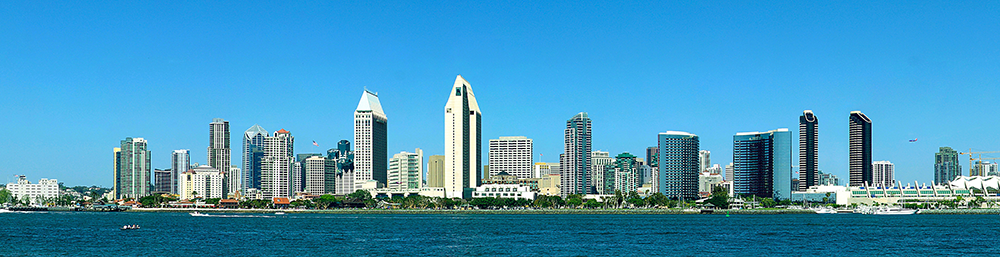

---

We start this session by installing a collection of the necessary libraries for this notebook. These inlcude 
- [Huggingface Datasets](https://github.com/huggingface/datasets)
- [Huggingface Transformers](https://github.com/huggingface/transformers)
- [Huggingface Tokenizers](https://github.com/huggingface/tokenizers)
- [Kneser-Ney Language models](https://pypi.org/project/knlm/)

In addition to these, we will be using the following preinstalled libraries:
- [NumPy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/)
- [SciPy](https://scipy.org/)
- [PyTorch](https://pytorch.org/)
- [matplotlib](https://matplotlib.org/)
- [Gensim](https://radimrehurek.com/gensim/)
- [Natural Language Toolkit](https://www.nltk.org/)

---

In [ ]:
from IPython.display import clear_output 
!pip install datasets
!pip install transformers
!pip install tokenizers
!pip install knlm
clear_output()

This notebook was prepared for the training course delivered at NCME 2022.

**Section 1 : Machine Learning**


---


Machine learning is the study of models that automatically improve by using data. 

The libraries we will require for this section are imported below.

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt



---


Let us demonstrate the basics of machine learning with a simple dataset. Let us first create two sets of points, one 

In [ ]:
X1 = np.random.multivariate_normal([1,0], [[1,0],[0,1]], 500)
X2 = np.random.multivariate_normal([-1,0], [[1,0],[0,1]], 500)
X = np.concatenate([X1,X2],0)
y = np.concatenate([np.zeros(500),np.ones(500)])

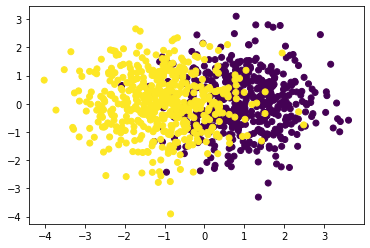

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
sigmoid = lambda x: 1/(1-np.exp(-x))
f = lambda a,x:sigmoid(a[0]*x[0]+a[1]*x[1] + a[2])
dist = lambda a,x,y: np.abs(f(a,x) - y)
loss = lambda a:sum([dist(a,x,y) for x,y in zip(X,y)])

In [ ]:
res = optimize.minimize(loss, [-10,0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
pred_class =[0 if f(res['x'], x) < 0.5 else 1 for x in X]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


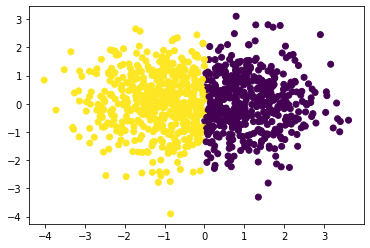

In [ ]:
plt.scatter(X[:,0],X[:,1],c=pred_class)

In [ ]:
correct = sum([int(y_true)==int(pred) for y_true,pred in zip(y,pred_class)])
print(correct/len(y))

0.839


Unfortunately, this is cheating! The "correct" thing to do is to make sure that the method you use has not seen the data you are validating on. What often needs to happen is that we split the data into a training set, and a testing set. 

In [ ]:
train_indices = np.random.choice(range(1000), size=750, replace=False)
test_indices = [x for x in range(1000) if x not in train_indices]

In [ ]:
X_train, y_train = np.stack([X[i] for i in train_indices],0), [y[i] for i in train_indices]
X_test, y_test = np.stack([X[i] for i in test_indices],0), [y[i] for i in test_indices]

In [ ]:
loss = lambda a:sum([dist(a,x,y) for x,y in zip(X_train,y_train)])
res = optimize.minimize(loss, [-10,0,1], method="Powell")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
pred_class =[int(np.round(f(res['x'], x))) for x in X_test]
correct = sum([int(y_true)==int(pred) for y_true,pred in zip(y_test,pred_class)])
print(correct/len(y_test))

0.876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


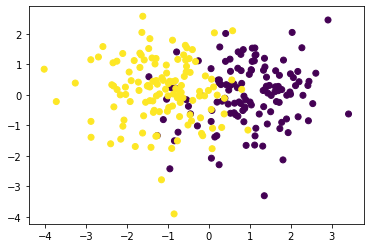

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

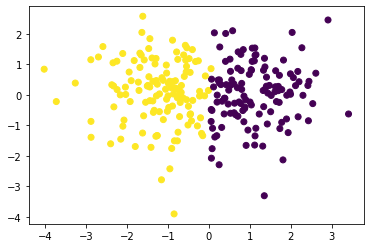

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_class)

In [ ]:
X1 = np.random.multivariate_normal([1,0], [[1,0],[0,1]], 300)
X2 = np.random.multivariate_normal([-1,0], [[1,0],[0,1]], 300)
X3 = np.random.multivariate_normal([0,3], [[1,0],[0,1]], 300)
X = np.concatenate([X1,X2,X3],0)
y = np.concatenate([np.zeros(300),np.ones(300),2*np.ones(300)])

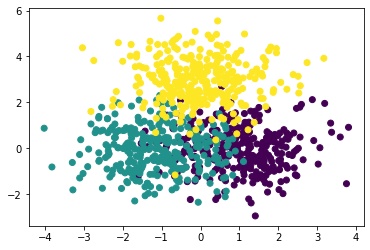

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

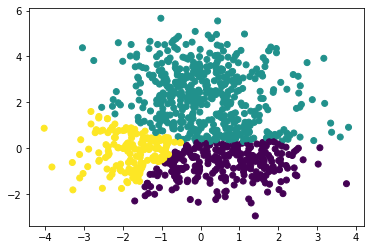

In [ ]:
Y = np.concatenate([[[1,0,0] for _ in range(300)],[[0,1,0] for _ in range(300)],[[0,0,1] for _ in range(300)]])
A0 = np.random.normal(0,3, (3*3))
Xt = np.concatenate([X,np.ones((900,1))],1)
loss = lambda A:sum(sum((sigmoid(np.matmul(Xt,A.reshape((3,3))))-Y)**2))
res = optimize.minimize(loss, A0, method="cobyla")
pred = np.argmax(sigmoid((sigmoid(np.matmul(Xt,res['x'].reshape((3,3)))))),1)
plt.scatter(X[:,0],X[:,1],c=pred)

***Section 2:Sci-kit-learn, Pandas, and BoW***


---



The libraries we will require for this section are imported below.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             cohen_kappa_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from datasets import load_dataset
from collections import Counter



---

We start by defining some data, as we did before.

In [ ]:
X1 = np.random.multivariate_normal([1,0], [[1,0],[0,1]], 300)
X2 = np.random.multivariate_normal([-1,0], [[1,0],[0,1]], 300)
X3 = np.random.multivariate_normal([0,3], [[1,0],[0,1]], 300)
X = np.concatenate([X1,X2,X3],0)
y = np.concatenate([np.zeros(300),np.ones(300),2*np.ones(300)])

We start by defining some data, as we did before.

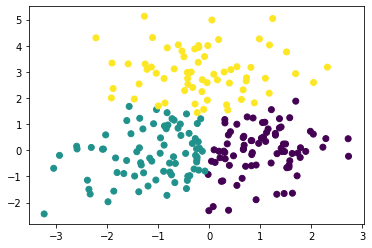

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

We can now evaluate the models with respect to a range of metrics.

In [ ]:
smd = lambda x,y: np.abs(np.mean(x) - np.mean(y))/np.sqrt((np.std(x)**2+np.std(y)**2)/2)

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(cohen_kappa_score(y_pred, y_test, weights="quadratic"))
print(smd(y_pred,y_test))

0.8488888888888889
0.852424091999669
0.8627002288329519
0.05527899928227816


Since each classifier has the same set of functions, we can compare different classifiers.

In [ ]:
for classifier in [RandomForestClassifier, 
                   DecisionTreeClassifier,
                   LogisticRegression,
                   GaussianNB]:
  clf = classifier()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classifier)
  print(accuracy_score(y_pred, y_test))
  print(smd(y_pred,y_test))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7733333333333333
0.07204123473323201
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7377777777777778
0.02216347112458495
<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.8488888888888889
0.05527899928227816
<class 'sklearn.naive_bayes.GaussianNB'>
0.84
0.06636725554219937


A Bag of Words classifier is a word frequency-based 

In [ ]:

train_data = load_dataset("imdb", split="train")
test_data = load_dataset("imdb", split="test")

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


In [ ]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

print(train_df.iloc[0])

text     I rented I AM CURIOUS-YELLOW from my video sto...
label                                                    0
Name: 0, dtype: object


In [ ]:
from collections import Counter
print(Counter(train_df['label']))
print(Counter(test_df['label']))

Counter({0: 12500, 1: 12500})
Counter({0: 12500, 1: 12500})


In [ ]:
vect = TfidfVectorizer()
Z_train = vect.fit_transform(train_df['text'])
Z_test = vect.transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']

clf = RandomForestClassifier()
clf.fit(Z_train, y_train)
y_pred = clf.predict(Z_test)

LSA = TruncatedSVD(n_components=300)
X_train = LSA.fit_transform(Z_train)
X_test = LSA.transform(Z_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(cohen_kappa_score(y_pred, y_test))

0.86756
0.73512


**Section 3 : Language Models**

---


The libraries we will require for this section are imported below.

In [1]:
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from datasets import load_dataset
from collections import Counter

ModuleNotFoundError: ignored

---


In [ ]:
tokenizer = RegexpTokenizer(pattern=r'\w+|\$[\d\.]+|\S+')
text_dataset = load_dataset("NahedAbdelgaber/evaluating-student-writing",split='train')

In [ ]:
all_text = ' '.join(text_dataset['text']).lower()
words = tokenizer.tokenize(all_text)
data = ngrams(words,n=3)

In [ ]:
counts = Counter(data)

In [ ]:
def random_next(word1, word2):
  my_counts = {x:v for x,v in counts.items() if word1 == x[0] and word2 == x[1]}
  return np.random.choice([x[2] for x in my_counts],p=[x[1]/sum(my_counts.values()) for x in my_counts.items()])

def generate(text, k):
  tokens = tokenizer.tokenize(text)
  for i in range(k):
    tokens.append(random_next(tokens[-2],tokens[-1]))
  return ' '.join(tokens)

In [ ]:
generate("i am",100)

"i am not trying to collect data from a teacher designs the projects , such as procrastination and laziness is not good and the trouble if good for them so it can help each other with new electors were kind of emotions shes having because she knows way more about its gonna be a simpler overview on the road . in source two , and we got pictures back then , it states 'long ago venus may well once have been researching for the class . if the principal : i went back and forth , technology is very useful . this"

In [ ]:
random_next("train","can")

ValueError: ignored

In [ ]:
train, test = train_test_split(text_dataset['text'], test_size=0.5)

train_text = ' '.join(train).lower()
test_text = ' '.join(test).lower()

train_words= tokenizer.tokenize(train_text)
test_words= tokenizer.tokenize(test_text)

T1 = Counter(train_words) 
T2 = Counter(test_words)

In [ ]:
words = lambda i:{w:k for w,k in T1.items() if k==i}
{i:np.mean([T2[w] for w in words(i)]) for i in range(1,10)}

{1: 0.4291313423933881,
 2: 1.4024276377217553,
 3: 2.4475224346468982,
 4: 3.334237288135593,
 5: 4.33712512926577,
 6: 5.520435967302452,
 7: 6.51685393258427,
 8: 7.4,
 9: 8.463840399002494}

The Knesey-Ney model has some assumptions that there is a minimal probability of words appearing. 

In [ ]:
from knlm import KneserNey
mdl = KneserNey(3, 4)
for x in text_dataset['text']:
  mdl.train(tokenizer.tokenize(x.lower()))
mdl.optimize()

In [ ]:
print(mdl.evaluateSent("hello , my name is alexander".split()))
print(mdl.evaluateSent("hello , my name is john".split()))

NameError: ignored

Embeddings

In [ ]:
import gensim
import gensim.downloader as api
import pandas as pd

In [ ]:
model = gensim.models.Word2Vec([tokenizer.tokenize(x.lower()) for x in train], size=300)

In [ ]:
model.most_similar("man")

In [ ]:
from datasets import load_dataset

train_data = load_dataset("imdb", split="train")
test_data = load_dataset("imdb", split="test")
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


In [ ]:
def avg_embed(text):
  words = [x for x in tokenizer.tokenize(text.lower())]
  X = np.stack([model.wv[x] for x in words if x in model.wv])
  return X.mean(0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             cohen_kappa_score)
smd = lambda x,y: np.abs(np.mean(x) - np.mean(y))/np.sqrt((np.std(x)**2+np.std(y)**2)/2)

X_train = train_df['text'].map(avg_embed).apply(pd.Series)
X_test = test_df['text'].map(avg_embed).apply(pd.Series)

clf = RandomForestClassifier()
clf.fit(X_train, train_df['label'])
y_pred = clf.predict(X_test)

print(cohen_kappa_score(y_pred, train_df['label'], weights="quadratic"))
print(accuracy_score(y_pred, train_df['label']))

0.43384
0.71692


In [ ]:
print(cohen_kappa_score(y_pred, train_df['label'], weights="quadratic"))
print(accuracy_score(y_pred, train_df['label']))

0.42247999999999997
0.71124


**Section 4 : Pytorch**

In [ ]:
import torch
from torch import nn

In [ ]:
class configuration():
  pass
  
config = configuration
config.num_tokens = 30000
config.embedding_dim = 64
config.hidden_units = 128
config.num_layers = 2
config.dropout = 0.1

In [ ]:
class LSTMClassifier(nn.Module):

  def __init__(self):
    self.embedding = nn.Embedding(num_embeddings=config.num_tokens,
                                  embedding_dim=config.embedding_dim)
    self.rnn = nn.LSTM(input_size = config.embedding_dim,
                       num_layers = config.num_layers,
                       hidden_size = config.hidden_units,
                       dropout = config.dropout,
                       batch_first = True)
    self.classifier = nn.Linear(in_features = config.hidden_units,
                                out_features = 2)
  
  def forward(self, model_input):
    pass

In [ ]:
model = LSTMClassifier()

**Section 5: Language Models I**

In [ ]:
from transformers import (AutoTokenizer,
                          BertForMaskedLM)

In [ ]:
model = BertForMaskedLM.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

[{'score': 0.10731077939271927,
  'sequence': "hello i'm a fashion model.",
  'token': 4827,
  'token_str': 'fashion'},
 {'score': 0.0877445638179779,
  'sequence': "hello i'm a role model.",
  'token': 2535,
  'token_str': 'role'},
 {'score': 0.05338413640856743,
  'sequence': "hello i'm a new model.",
  'token': 2047,
  'token_str': 'new'},
 {'score': 0.046672213822603226,
  'sequence': "hello i'm a super model.",
  'token': 3565,
  'token_str': 'super'},
 {'score': 0.027095887809991837,
  'sequence': "hello i'm a fine model.",
  'token': 2986,
  'token_str': 'fine'}]

In [ ]:
unmasker("This man works as a [MASK].")

[{'score': 0.07510628551244736,
  'sequence': 'this man works as a carpenter.',
  'token': 10533,
  'token_str': 'carpenter'},
 {'score': 0.04641908407211304,
  'sequence': 'this man works as a lawyer.',
  'token': 5160,
  'token_str': 'lawyer'},
 {'score': 0.03914575278759003,
  'sequence': 'this man works as a farmer.',
  'token': 7500,
  'token_str': 'farmer'},
 {'score': 0.03280143067240715,
  'sequence': 'this man works as a businessman.',
  'token': 6883,
  'token_str': 'businessman'},
 {'score': 0.02929232083261013,
  'sequence': 'this man works as a doctor.',
  'token': 3460,
  'token_str': 'doctor'}]

In [ ]:
unmasker("This woman works as a [MASK].")

[{'score': 0.12795130908489227,
  'sequence': 'this woman works as a nurse.',
  'token': 6821,
  'token_str': 'nurse'},
 {'score': 0.07453176379203796,
  'sequence': 'this woman works as a maid.',
  'token': 10850,
  'token_str': 'maid'},
 {'score': 0.0719112753868103,
  'sequence': 'this woman works as a teacher.',
  'token': 3836,
  'token_str': 'teacher'},
 {'score': 0.06133751571178436,
  'sequence': 'this woman works as a waitress.',
  'token': 13877,
  'token_str': 'waitress'},
 {'score': 0.04157010465860367,
  'sequence': 'this woman works as a prostitute.',
  'token': 19215,
  'token_str': 'prostitute'}]

**Section 6 : Language Models II**

In [ ]:
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          Trainer,
                          TrainingArguments)